# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The task is to develop a predictive model to analyze the key factors influencing the prices of used cars. Using historical data on used car listings, we will identify relevant features such as vehicle age, make and model, fuel type, location, and condition. Our objective is to apply exploratory data analysis (EDA) and statistical modeling techniques, such as regression analysis or machine learning algorithms & tune the hyperparameters to quantify the impact of these factors on price and build a model that can accurately predict used car values.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

**Steps Taken for Data Understanding and Preparation**
1. **Dataset Exploration:** Analyzed column names, data types, and the nature of values to understand the dataset structure.
2. **Handling Missing Values:** Filled missing data using mode, predictive imputation considering the closely related columns.
3. **Data Cleaning:** Removed irrelevant columns and dropped unnecessary rows.
4. **Data Visualization:** Used visual analysis to identify patterns and relationships within the data.
5. **Feature Grouping:** Grouped similar columns to enhance generalization and simplify analysis.
6. **Outlier Treatment:** Detected and removed outliers by applying the interquartile range (IQR) method to numerical columns.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
vehicles_raw = pd.read_csv('data/vehicles.csv')

In [10]:
vehicles_raw.shape

(426880, 18)

In [11]:
vehicles_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [12]:
vehicles_raw.head(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


We have 17 columns. Of these, to predict the factors that affect the price, we don't need unique identifier column like id, & VIN. We can drop them. 

In [14]:
vehicles = vehicles_raw.drop(columns= ['id', 'VIN'])

In [15]:
vehicles.isnull().sum()

region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

We see many colmns have a lot of missing values.

**Handling Missing Values**

Some rows are missing important column values. So dropping them.

In [19]:
rows_to_remove = vehicles[(vehicles['manufacturer'].isnull() & vehicles['model'].isnull() & vehicles['odometer'].isnull() & vehicles['condition'].isnull())]

In [20]:
vehicles = vehicles[~vehicles.apply(tuple, axis=1).isin(rows_to_remove.apply(tuple, axis=1))]

In [21]:
vehicles = vehicles[~vehicles['year'].isnull()]
vehicles['year'] = vehicles['year'].astype(int)

In [22]:
vehicles[vehicles['price']==0]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
46,auburn,0,2011,jeep,compass,excellent,NaN,gas,99615.0,clean,automatic,NaN,full-size,SUV,NaN,al
126,auburn,0,2018,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,rwd,full-size,van,white,al
127,auburn,0,2019,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,rwd,full-size,van,white,al
128,auburn,0,2018,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,rwd,full-size,van,white,al
191,birmingham,0,2015,nissan,sentra,excellent,4 cylinders,gas,99505.0,clean,automatic,fwd,NaN,sedan,silver,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426764,wyoming,0,2018,NaN,peterbilt 579,NaN,NaN,diesel,1.0,clean,automatic,NaN,NaN,NaN,NaN,wy
426812,wyoming,0,2006,toyota,scion tc,excellent,4 cylinders,gas,195000.0,clean,automatic,fwd,NaN,NaN,silver,wy
426832,wyoming,0,2004,toyota,prius,excellent,4 cylinders,hybrid,239000.0,clean,automatic,fwd,NaN,NaN,blue,wy
426836,wyoming,0,2018,ram,2500,excellent,6 cylinders,diesel,20492.0,clean,automatic,4wd,full-size,truck,white,wy


Our goal os the determine the factors influenceing the price. We have 32k rows whose price is 0. This will distrupt our goal, so dropping them.

In [24]:
vehicles = vehicles[vehicles['price']!=0]

**Fuel Column**

In [26]:
vehicles['fuel'].unique()

array(['gas', 'other', 'diesel', 'hybrid', nan, 'electric'], dtype=object)

In [27]:
vehicles['cylinders'].unique()

array(['8 cylinders', '6 cylinders', nan, '4 cylinders', '5 cylinders',
       'other', '3 cylinders', '10 cylinders', '12 cylinders'],
      dtype=object)

As electric cars have no engine and thus no cylinder, we can setting cylinder column in electric cars to 'other'.

In [29]:
vehicles.loc[vehicles['fuel'] == 'electric', 'cylinders'] = 'other'

In [30]:
vehicles['fuel'].isnull().sum()

2335

In [31]:
vehicles = vehicles.dropna(subset=['fuel'])

**Transmission Column**

In [33]:
vehicles['transmission'].value_counts()

transmission
automatic    303867
other         61366
manual        23755
Name: count, dtype: int64

In [34]:
vehicles['transmission'].isnull().sum()

1489

In [35]:
vehicles = vehicles.dropna(subset=['transmission'])

**Odometer**

Some odometer values are less than 20, which is not very common in used cars. So we are dropping those recods with very minimum value.

In [38]:
vehicles = vehicles.loc[vehicles['odometer'] >= 20]

**Model & Manufacturer Columns**

In [40]:
vehicles[(vehicles['manufacturer'].isnull()) & (vehicles['model'].str.match(r'^\d+$', na=False))]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
438,birmingham,1500,1988,NaN,1988,good,6 cylinders,gas,89000.0,clean,manual,4wd,NaN,NaN,NaN,al
3524,huntsville / decatur,4000,2001,NaN,2001,excellent,8 cylinders,gas,158094.0,clean,automatic,fwd,full-size,sedan,white,al
5901,anchorage / mat-su,23000,2014,NaN,2014,NaN,NaN,gas,120000.0,salvage,automatic,NaN,NaN,truck,NaN,ak
8254,kenai peninsula,2500,2000,NaN,2000,NaN,NaN,gas,128742.0,clean,automatic,NaN,NaN,NaN,NaN,ak
12363,phoenix,6900,2007,NaN,2007,good,NaN,gas,65000.0,clean,automatic,NaN,NaN,NaN,NaN,az
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426840,wyoming,65999,2017,NaN,2017,NaN,NaN,diesel,73000.0,clean,automatic,NaN,NaN,NaN,NaN,wy
426841,wyoming,16999,2014,NaN,2014,NaN,NaN,gas,89000.0,clean,automatic,NaN,NaN,NaN,NaN,wy
426842,wyoming,22999,2013,NaN,2013,NaN,NaN,gas,120000.0,clean,automatic,NaN,NaN,NaN,NaN,wy
426843,wyoming,21999,2017,NaN,2017,NaN,NaN,gas,51000.0,clean,automatic,NaN,NaN,NaN,NaN,wy


As we notice above, there are ~400rows which miss a manufacturer column value ad has just year in the model column. It is less feasible to impute these values, so dropping them.

In [42]:
row_without_manufacturer_model = vehicles[(vehicles['manufacturer'].isnull()) & (vehicles['model'].str.match(r'^\d+$', na=False))]
vehicles = vehicles[~vehicles.apply(tuple, axis=1).isin(row_without_manufacturer_model.apply(tuple, axis=1))]

Instead of having 2 features separately, we are combining them into a single feature

In [44]:
vehicles['manufacturer_model'] = vehicles['manufacturer'].fillna('')+"-"+vehicles['model'].fillna('')

**Condition & Title Status Columns**

In [46]:
vehicles['condition'].unique()

array(['good', 'excellent', 'fair', nan, 'like new', 'new', 'salvage'],
      dtype=object)

In [47]:
vehicles['title_status'].unique()

array(['clean', 'rebuilt', 'lien', nan, 'salvage', 'missing',
       'parts only'], dtype=object)

There are a few records which have both the values missing. These are closely related to each other. We cannot impute accurately them if both are missing.

In [49]:
no_condition_titleStatus = vehicles[(vehicles['condition'].isnull()) & (vehicles['title_status'].isnull())]
vehicles = vehicles[~vehicles.apply(tuple, axis=1).isin(no_condition_titleStatus.apply(tuple, axis=1))]

In [50]:
vehicles.loc[(vehicles['title_status'] == 'salvage') & (vehicles['condition'].isna()), 'condition'] = 'salvage'

In [51]:
vehicles = vehicles[~vehicles['title_status'].isnull()]

**Cylinders, Type & Size**

In [53]:
vehicles['cylinders'].unique()

array(['8 cylinders', '6 cylinders', nan, '4 cylinders', '5 cylinders',
       'other', '3 cylinders', '10 cylinders', '12 cylinders'],
      dtype=object)

we are planning to group cylinders, to avoid too many unique values

In [55]:
vehicles['cylinders'] = vehicles['cylinders'].replace({'other':'0-3 cylinders', 
                                                       '3 cylinders': '0-3 cylinders', 
                                                       '5 cylinders': '5-6 cylinders',
                                                       '6 cylinders': '5-6 cylinders', 
                                                       '10 cylinders': '10+ cylinders', 
                                                       '12 cylinders': '10+ cylinders'})

Type & Size of vehicles is decided based on the number of cylinders. There are 95k rows with don't have cylinders and has type values.
If all 3 are null, its not possible to impute close values.

In [57]:
rows_without_cylinder_size_type = vehicles[(vehicles['cylinders'].isnull()) & (vehicles['size'].isnull()) & ((vehicles['type'].isnull())|(vehicles['type']== 'other'))]
vehicles = vehicles[~vehicles.apply(tuple, axis=1).isin(rows_without_cylinder_size_type.apply(tuple, axis=1))]

Imputing cylinders column based on size.

In [59]:
def impute_cylinders(row):
    if pd.isna(row['cylinders']) and not(pd.isna(row['size'])):  
        size_mapping = {
            'sub-compact': '0-3 cylinders',
            'compact': '4 cylinders',
            'mid-size': '5-6 cylinders', 
            'full-size': '8 cylinders'
        }
        return size_mapping.get(row['size'], np.nan)  
    return row['cylinders']

In [60]:
vehicles['cylinders'] = vehicles.apply(impute_cylinders, axis=1)

Imputing cylinders column based on Type column.

In [62]:
def impute_cylinders_from_type(row):
    if pd.isna(row['cylinders']) and not(pd.isna(row['type'])):  # Check if cylinders is NaN
        type_to_cylinders = {
            'pickup': '5-6 cylinders',  # Pickup trucks commonly have 6 or 8 cylinders
            'truck': '8 cylinders',   # Heavy trucks commonly have 8 cylinders
            'coupe': '4 cylinders',    # Coupes typically have 4 or 6 cylinders
            'SUV': '5-6 cylinders',      # SUV commonly have 6 cylinders (though some have 4 or 8)
            'hatchback': '4 cylinders',  # Hatchbacks usually have 4 cylinders
            'mini-van': '5-6 cylinders',  # Mini-vans typically have 6 cylinders
            'sedan': '4 cylinders',     # Sedans typically have 4 cylinders
            'offroad': '5-6 cylinders',   # Off-road vehicles usually have 6 or 8 cylinders
            'bus': '5-6 cylinders',       # Buses often have 6, 8, or 10 cylinders
            'convertible': '4 cylinders',  # Convertibles often have 4 or 6 cylinders
            'wagon': '4 cylinders',     # Wagons generally have 4 or 6 cylinders
            'van': '5-6 cylinders'        # Vans commonly have 6 cylinders
        }
        return type_to_cylinders.get(row['type'], np.nan)  # Return mapped value or NaN
    return row['cylinders']

In [63]:
vehicles['cylinders'] = vehicles.apply(impute_cylinders_from_type, axis=1)

Imputing Size column based on Cylinders column.

In [65]:
def impute_size_with_cylinders(row):
    if pd.isna(row['size']) and not(pd.isna(row['cylinders'])):  # Check if cylinders is NaN
        cylinder_size_mapping = {
            '0-3 cylinders':'sub-compact',
            '4 cylinders': 'compact',
            '5-6 cylinders':'mid-size',
            '8 cylinders':'full-size',
            '10+ cylinders':'full-size'
        }
        return cylinder_size_mapping.get(row['cylinders'], np.nan)  # Return mapped value or NaN
    return row['size']

In [66]:
vehicles['size'] = vehicles.apply(impute_size_with_cylinders, axis=1)

**Condition Column**

In [68]:
vehicles['condition'].unique()

array(['good', 'excellent', 'fair', 'like new', nan, 'new', 'salvage'],
      dtype=object)

In [69]:
vehicles = vehicles.convert_dtypes()

Predict condition based on year, title_status, odometer, cylinders, transmission

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [72]:
vehicles.loc[:, 'condition'] = vehicles['condition'].fillna("Unknown")

In [73]:
le = LabelEncoder()
le_condition = LabelEncoder()
vehicles.loc[:,'condition_encoded'] = le_condition.fit_transform(vehicles['condition'])
vehicles.loc[:,'title_status_encoded'] = le.fit_transform(vehicles['title_status'])
vehicles.loc[:,'cylinders_encoded'] = le.fit_transform(vehicles['cylinders'])
vehicles.loc[:,'transmission_encoded'] = le.fit_transform(vehicles['transmission'])


In [74]:
train_condition = vehicles[vehicles['condition'] != "Unknown"]
test_condition = vehicles[vehicles['condition'] == "Unknown"]

In [75]:
if not test_condition.empty:
    model_condition = RandomForestClassifier()
    model_condition.fit(train_condition[['year','title_status_encoded', 'transmission_encoded','cylinders_encoded','odometer']], train_condition['condition_encoded'])    
    pred_condition = model_condition.predict(test_condition[['year','title_status_encoded', 'transmission_encoded','cylinders_encoded','odometer']])
    vehicles.loc[vehicles['condition'] == "Unknown", 'condition_encoded'] = list(pred_condition)
    vehicles.loc[vehicles['condition'] == "Unknown", 'condition'] = le_condition.inverse_transform(vehicles.loc[vehicles['condition'] == "Unknown", 'condition_encoded'])

In [76]:
vehicles = vehicles[~vehicles['type'].isnull()]

In [77]:
vehicles.isnull().sum()

region                      0
price                       0
year                        0
manufacturer             9039
model                    2396
condition                   0
cylinders                   0
fuel                        0
odometer                    0
title_status                0
transmission                0
drive                   52828
size                        0
type                        0
paint_color             46095
state                       0
manufacturer_model          0
condition_encoded           0
title_status_encoded        0
cylinders_encoded           0
transmission_encoded        0
dtype: int64

**Paint_color**

Filling in the paint_color column with the mode

In [80]:
vehicles['paint_color'] = vehicles['paint_color'].fillna(vehicles['paint_color'].mode()[0])

<h4>Handling Outliers</h4>

**Handling Outliers in Price Column**

In [83]:
Q1 = vehicles['price'].quantile(0.25)
Q3 = vehicles['price'].quantile(0.75)
IQR = Q3 - Q1

In [84]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
vehicles = vehicles[(vehicles['price'] >= lower_bound) & (vehicles['price'] <= upper_bound)]

**Handling Outliers in Odometer Column**

In [86]:
Q1 = vehicles['odometer'].quantile(0.25)
Q3 = vehicles['odometer'].quantile(0.75)
IQR = Q3 - Q1

In [87]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
vehicles = vehicles[(vehicles['odometer'] >= lower_bound) & (vehicles['odometer'] <= upper_bound)]

<h3>Data Visualization</h3>

Visualizing the top brands in the used cars market

In [90]:
manufacturer_group_summary = vehicles.groupby(by='manufacturer').size()
top_5_manufacturer = pd.DataFrame(manufacturer_group_summary).sort_values(by=0)[-5:]
top_5_manufacturer = top_5_manufacturer.reset_index()
top_5_manufacturer.rename(columns={0: 'count'}, inplace=True)

In [91]:
top_5_manufacturer

,manufacturer,count
0,nissan,12679
1,honda,14806
2,toyota,23581
3,chevrolet,34021
4,ford,42631


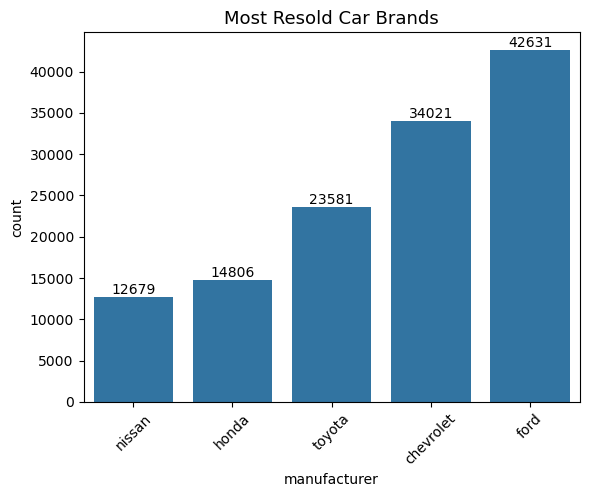

In [92]:
#Analyzing the most resold brand
ax = sns.barplot(x=top_5_manufacturer['manufacturer'], y=top_5_manufacturer['count'])
for i in ax.containers:
    ax.bar_label(i,)

plt.title('Most Resold Car Brands', fontsize=13)
plt.xticks(rotation=45)
plt.show()

Among all brands, Ford and Chevrolet have the highest resale frequency, indicating strong market demand.

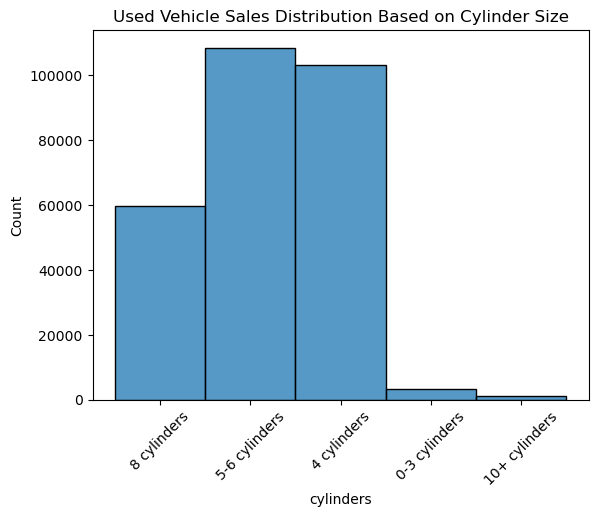

In [95]:
#Understanding the vehicle sales distribution based on the car's capacity
ax = sns.histplot(vehicles['cylinders'])
plt.title('Used Vehicle Sales Distribution Based on Cylinder Size', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Most buyers prefer mid-range cars with 4-6 cylinders, followed by 8-cylinder vehicles. This suggests that heavier vehicles are less desirable in the resale market.

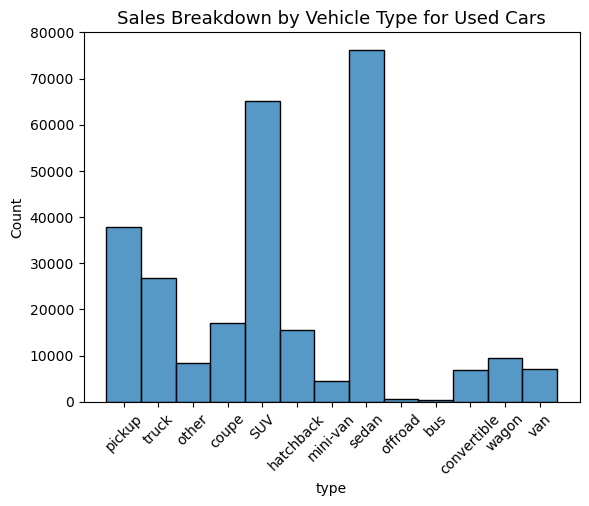

In [98]:
#Analysing sales based on the vehicle type
ax = sns.histplot(vehicles['type'])

plt.title('Sales Breakdown by Vehicle Type for Used Cars', fontsize=13)
plt.xticks(rotation=45)
plt.show()

Sedans and SUVs dominate the resale market, while off-road vehicles and buses are resold the least, highlighting buyer preferences for practical and versatile vehicle types.

In [100]:
vehicles_for_encoding= vehicles.drop(columns=['condition_encoded','title_status_encoded', 'cylinders_encoded','transmission_encoded','manufacturer','model'])

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

Next, we prepare the data for model training. Since most of the columns are categorical, we need to encode them based on their relevance and significance.

**Ordinal encoding:** 
1. condition
2. cylinders
3. title_status
4. size
   
**Nominal encoding:**
1. region
2. state
3. type
4. Fuel
5. transmission
6. paint_color

**Target Mean Encoding**
1. Manufacturer_model

**KNN Imputer**
1. drive

In [104]:
vehicles_encoded = vehicles_for_encoding.copy() 

In [105]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [106]:
categories = [['salvage', 'fair', 'good', 'excellent', 'like new', 'new'],
              ['0-3 cylinders', '4 cylinders', '5-6 cylinders', '8 cylinders', '10+ cylinders'],
              ['parts only', 'missing', 'salvage', 'rebuilt', 'lien', 'clean'],
              ['sub-compact', 'compact', 'mid-size', 'full-size' ]
             ]

In [107]:
encoder = OrdinalEncoder(categories=categories)  

In [108]:
vehicles_encoded[['condition', 'cylinders', 'title_status','size']] = encoder.fit_transform(vehicles_for_encoding[['condition', 'cylinders', 'title_status','size']])

In [109]:
brand_means = vehicles_encoded.groupby('manufacturer_model')['price'].mean()
vehicles_encoded['manufacturer_model'] = vehicles_encoded['manufacturer_model'].map(brand_means)

In [110]:
vehicles_encoded['region'] = LabelEncoder().fit_transform(vehicles_for_encoding['region'])
vehicles_encoded['state'] = LabelEncoder().fit_transform(vehicles_for_encoding['state'])
vehicles_encoded['fuel'] = LabelEncoder().fit_transform(vehicles_for_encoding['fuel'])
vehicles_encoded['transmission'] = LabelEncoder().fit_transform(vehicles_for_encoding['transmission'])
vehicles_encoded['fuel'] = vehicles_encoded['fuel'].map(vehicles_encoded['fuel'].value_counts(normalize=True))

In [111]:
vehicles_encoded['type'] = LabelEncoder().fit_transform(vehicles_for_encoding['type'])
vehicles_encoded['paint_color'] = LabelEncoder().fit_transform(vehicles_for_encoding['paint_color'])

In [112]:
vehicles_encoded['drive'].value_counts()

drive
4wd    95135
fwd    83843
rwd    44915
Name: count, dtype: Int64

In [113]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
vehicles_encoded['drive'] = imputer.fit_transform(vehicles_encoded[['manufacturer_model', 'fuel', 'cylinders','size','type']])[:, -1]

In [114]:
vehicles_encoded

,region,price,year,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,manufacturer_model
27,16,33590,2014,2.0,3.0,0.851568,57923,5.0,2,8.0,3.0,8,10,1,35224.934498
28,16,22590,2010,2.0,3.0,0.851568,71229,5.0,2,8.0,3.0,8,1,1,23677.257004
29,16,39590,2020,2.0,3.0,0.851568,19160,5.0,2,8.0,3.0,8,8,1,34744.226804
30,16,30990,2017,2.0,3.0,0.851568,41124,5.0,2,8.0,3.0,8,8,1,34749.481707
31,16,15000,2013,3.0,2.0,0.851568,128000,5.0,0,10.0,3.0,10,0,1,19439.724014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,397,23590,2019,2.0,2.0,0.851568,32226,5.0,2,9.0,2.0,9,10,50,23979.681818
426876,397,30590,2020,2.0,1.0,0.851568,12029,5.0,2,9.0,1.0,9,8,50,29800.909091
426877,397,34990,2020,2.0,1.0,0.049041,4174,5.0,2,4.0,1.0,4,10,50,34566.344086
426878,397,28990,2018,2.0,2.0,0.851568,30112,5.0,2,9.0,2.0,9,9,50,24410.111732


Now all the columns are encoded and are now used for model training

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

We are applying multiple regression models with k-fold cross-validation to predict the price and analyze the factors influencing the resale value of a used car.

**Cross-Validation of Multiple Models**

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression

In [120]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=100)
}

In [121]:
X = vehicles_encoded.drop(columns=['price'])
y = vehicles_encoded['price']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [123]:
k = 5
cv_results = {}

for name, model in models.items():
    pipeline = Pipeline(steps=[('model', model)])
    scores = cross_val_score(pipeline, X_train, y_train, cv=k, scoring='neg_root_mean_squared_error')
    cv_results[name] = np.mean(scores)  # Store average RMSE

In [124]:
for model, score in cv_results.items():
    print(f"{model}: {-score:.4f}")

Linear Regression: 6365.6306
Decision Tree: 5379.3674
Random Forest: 3834.1032


Choosing Decision Tree Regressor for the final model.

**Hyperparameter Tuning**

We chose the Decision Tree Regressor and are using GridSearchCV to fine-tune its hyperparameters for the final model. This approach allows us to systematically explore different hyperparameter combinations, ensuring that the model is optimized for better performance and accuracy. By performing this search, we can find the best settings to improve prediction quality and generalization.

In [127]:
param_grid = {
    "max_depth": [5, 10, 20, None], 
    "min_samples_split": [2, 5, 10],  
    "min_samples_leaf": [1, 5, 10],  
    "max_features": ["sqrt", "log2", None], 
}

In [128]:
dt = DecisionTreeRegressor(random_state=100)

In [129]:
grid_search = GridSearchCV(
    dt, param_grid, scoring="neg_mean_squared_error",
    cv=3, verbose=2, n_jobs=-1 
)

In [130]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=100), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=2)

In [131]:
best_model = grid_search.best_estimator_
print("Test R^2 Score:", best_model.score(X_test, y_test))

Test R^2 Score: 0.8583904887586307


In [132]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

**Model Training**

Among the three models evaluated, I chose the Decision Tree Regressor due to resource limitations, as the Random Forest model required significantly more computational time and memory to train. The Decision Tree Regressor, being less resource-intensive, offered a more feasible solution for this analysis within the available computational constraints.

In [135]:
final_model = DecisionTreeRegressor(**best_params, random_state=42)

final_model.fit(X_train, y_train)

test_score = final_model.score(X_test, y_test)

In [136]:
test_score

0.8583411203161018

In [137]:
ypred = final_model.predict(X_test)

In [139]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, ypred))
rmse

4758.057982559772

In [141]:
ypred.mean()

18599.73028165308

In [143]:
y_test.mean()

18618.161564687533

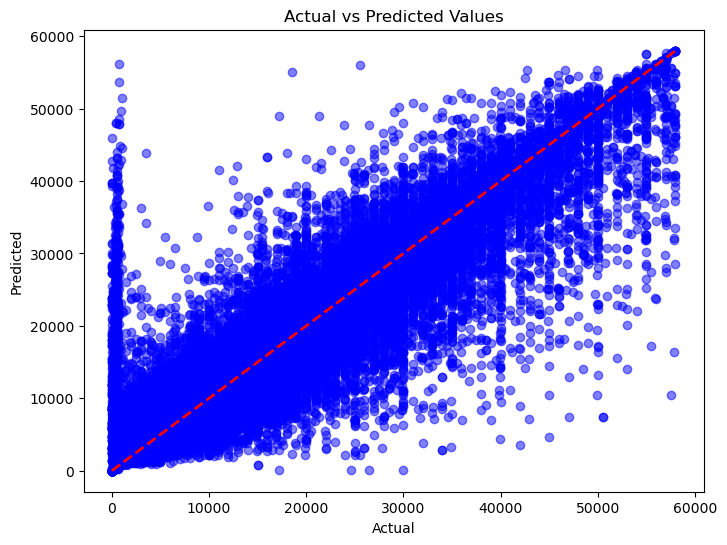

In [145]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, ypred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

In [147]:
final_model.feature_importances_

array([0.00743872, 0.16786841, 0.00784289, 0.01865105, 0.01435443,
       0.05114544, 0.00189466, 0.00749126, 0.00473521, 0.00415598,
       0.00568872, 0.00624356, 0.00921564, 0.69327402])

In [149]:
final_model.feature_names_in_

array(['region', 'year', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'size', 'type',
       'paint_color', 'state', 'manufacturer_model'], dtype=object)

In [153]:
feature_importances = dict(zip(final_model.feature_names_in_, final_model.feature_importances_) )
feature_importances

{'region': 0.007438724482245646,
 'year': 0.16786841360989943,
 'condition': 0.007842886596430305,
 'cylinders': 0.018651050109063205,
 'fuel': 0.0143544331320697,
 'odometer': 0.051145438228377166,
 'title_status': 0.0018946584471070897,
 'transmission': 0.007491257107893237,
 'drive': 0.004735209898176476,
 'size': 0.004155984135475091,
 'type': 0.005688722331852114,
 'paint_color': 0.0062435571553496345,
 'state': 0.00921564497134088,
 'manufacturer_model': 0.6932740197947201}

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

We see the importance assigned to various features by the model. This explains that the manufacturer, model, year, odometer, fuel type, cylinders

We compared the performance of various models using k-fold cross-validation and conducted hyperparameter tuning to build an optimized Decision Tree Regressor. Upon analyzing the feature importances assigned by the model, we observe that manufacturer, model, and model year have the greatest influence on the prediction, demonstrating their strong contribution to the resale price.



### Conclusion

The machine learning model highlights the key factors influencing the resale price of a used car. The **manufacturer, model, year, odometer reading, fuel type, and cylinders** are the most significant. 
This clearly shows that buyers are particularly interested in factors such as the car's usage duration, engine power, and fuel type, in addition to the model, when purchasing a resold car.
These insights can help dealers fine-tune their inventory by focusing on the attributes that have the greatest impact on pricing.